In [1]:
import numpy as np
from MapLines.tools.line_fit import line_fit,line_fit_single
import MapLines.tools.tools as tol
import os.path as ptt
import warnings
warnings.filterwarnings('ignore')

## GET SDSS DATA

In [2]:
call='wget https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5715/spec-5715-56657-0166.fits .'
tol.sycall(call)
call='mv spec-5715-56657-0166.fits ../example_data/.'
tol.sycall(call)

--2025-04-07 13:59:43--  https://data.sdss.org/sas/dr16/eboss/spectro/redux/v5_13_0/spectra/lite/5715/spec-5715-56657-0166.fits
Resolviendo data.sdss.org (data.sdss.org)... 155.101.19.133
Conectando con data.sdss.org (data.sdss.org)[155.101.19.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 218880 (214K) [application/octet-stream]
Guardando como: ‘spec-5715-56657-0166.fits’

     0K .......... .......... .......... .......... .......... 23%  756K 0s
    50K .......... .......... .......... .......... .......... 46%  866K 0s
... .......... .......... 70%  253K 0s
   150K .......... .......... .......... .......... .......... 93% 40,6M 0s
   200K .......... ...                                        100% 63,4M=0,3s

2025-04-07 13:59:44 (662 KB/s) - ‘spec-5715-56657-0166.fits’ guardado [218880/218880]

--2025-04-07 13:59:44--  http://./
Resolviendo . (.)... falló: No existe ninguna dirección asociada al nombre.
wget: no se pudo resolver la dirección d

## GET MANGA DATA

In [3]:
call='wget https://data.sdss.org/sas/dr17/manga/spectro/redux/v3_1_1/8144/stack/manga-8144-3702-LINCUBE.fits.gz .'
#tol.sycall(call) #/usr/local/bin/wget
call='mv manga-8144-3702-LINCUBE.fits.gz ../example_data/.'
#tol.sycall(call)

## FIT SDSS Spectra

Multiprocessing took 8.4 seconds


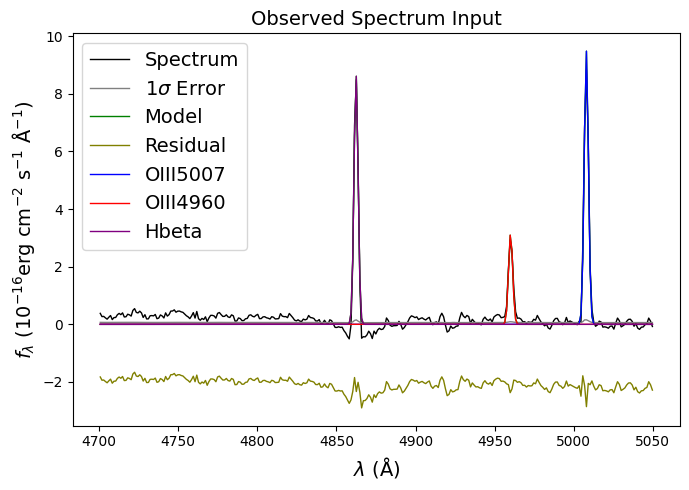

Best fit parameters:
Ao0=9.490847870735777 dvo0=-17.162898228215887 fwhmo0=186.98360511676105 Ao2=8.66813207412469 


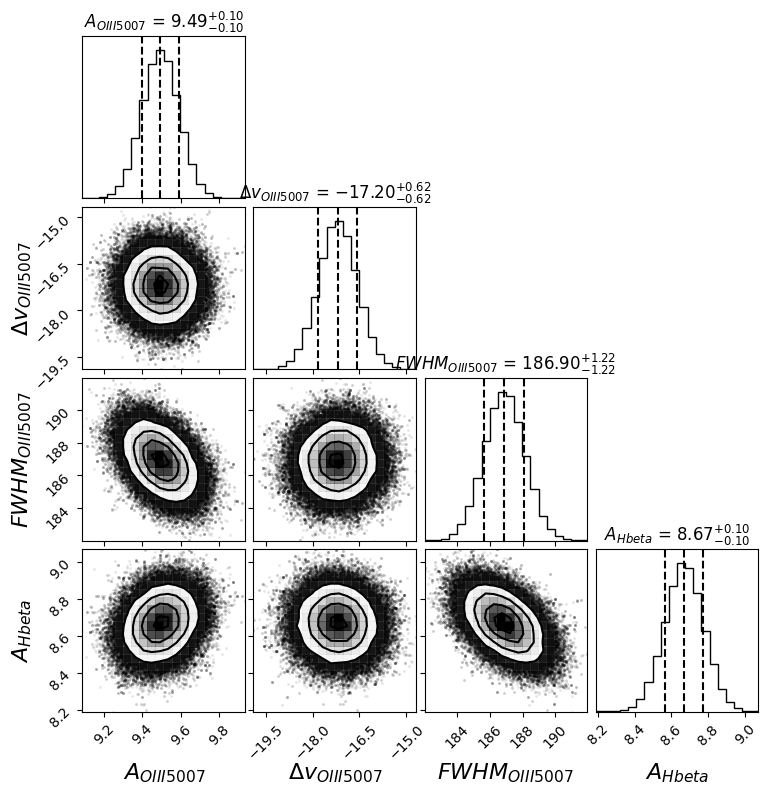

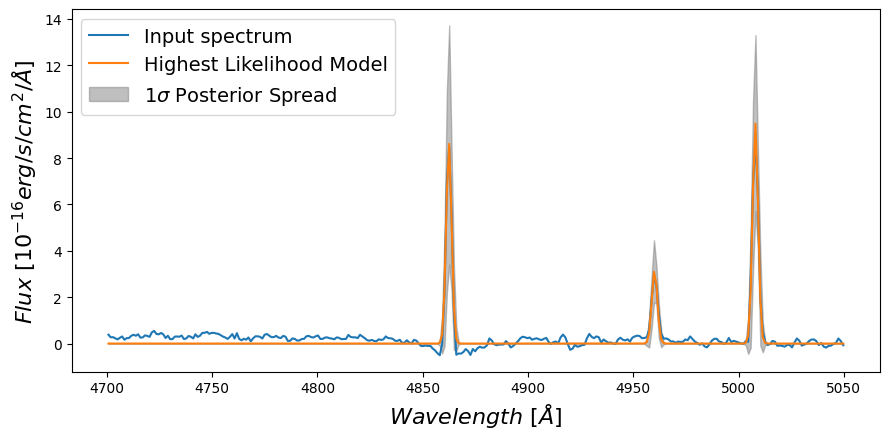

In [4]:
name_out='spec-5715-56657-0166'
cont=False
cont=True
error_c=True
lA1=4700.0
lA2=5050.0
skew=False
lorentz=False
outflow=False
flux_f=1/10.0   #Set the flux to 10^-16erg/s/A/cm2 instead of the SDSS 10^-17 erg/s/A/cm2   
dirt='../example_data/'
dir_out='outputs/'
ncpus=6
input_format='SDSS'
zt=0.0255
file1=dirt+'NAME.fits'.replace('NAME',name_out) 
if ptt.exists(dir_out) == False:
    tol.sycall('mkdir -p '+dir_out)
config_lines='line_prop_HbOIII.yml'
file_out=dir_out+'NAME_modelsV2'.replace('NAME',name_out)+'_HbOIII'
file_out2=dir_out+'NAME_paramV2'.replace('NAME',name_out)+'_HbOIII'
name_out2=name_out+'_HbOIII'
line_fit_single(file1,file_out,file_out2,name_out2,input_format=input_format,z=zt,lA1=lA1,lA2=lA2,ncpu=ncpus,lorentz=lorentz,
         skew=skew,flux_f=flux_f,erft=0.75,cont=cont,error_c=error_c,config_lines=config_lines,outflow=outflow)

Multiprocessing took 8.0 seconds


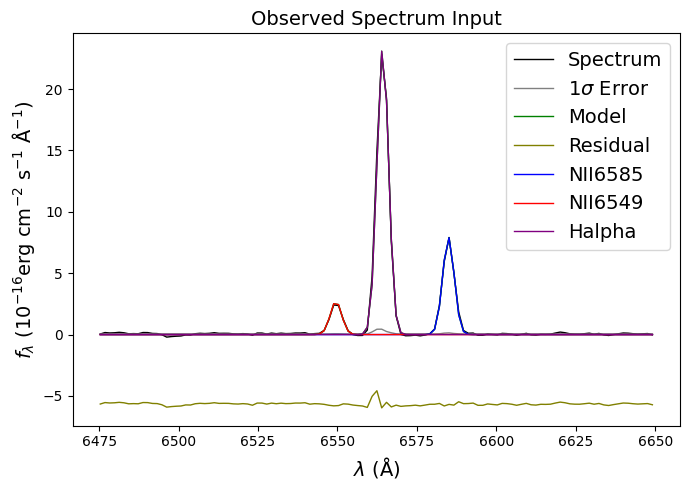

Best fit parameters:
Ao0=7.933190479622372 dvo0=-14.9293307031667 fwhmo0=193.440860810691 Ao2=23.518428031531304 


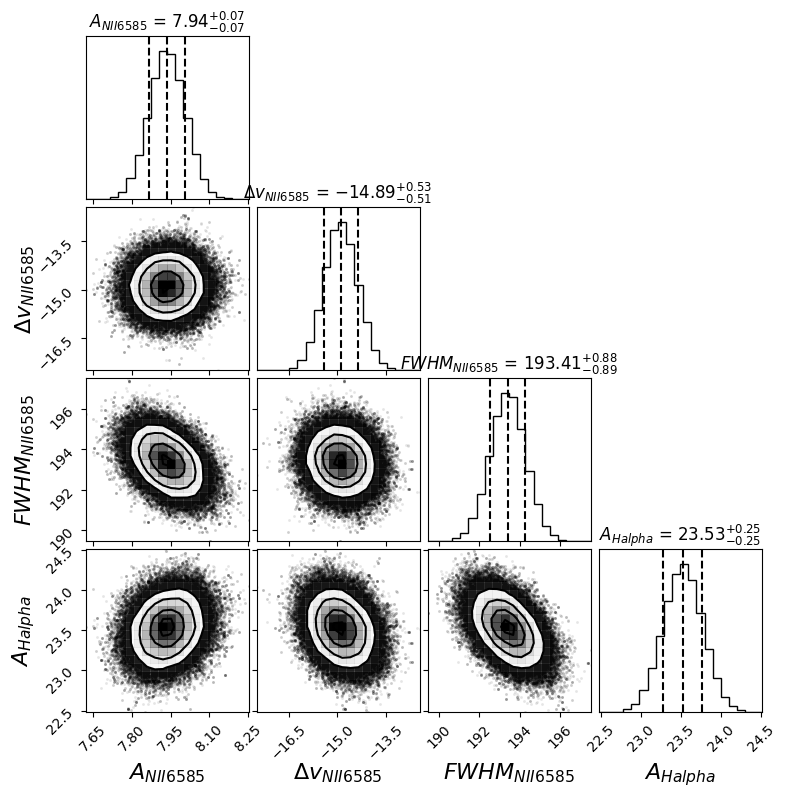

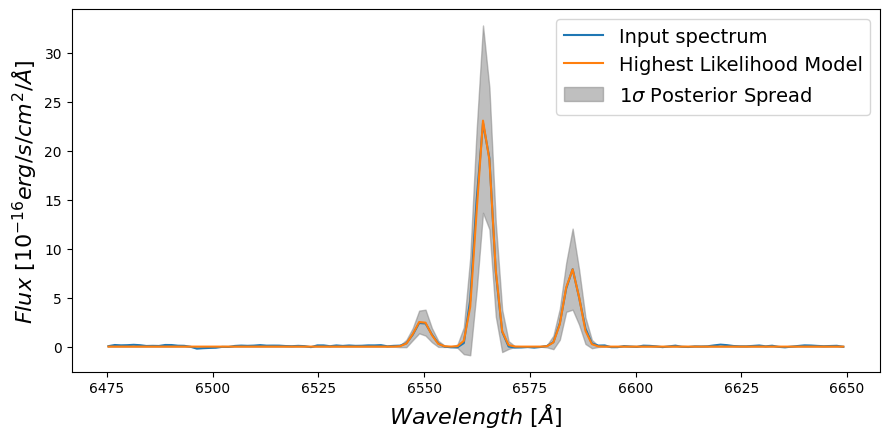

In [5]:
name_out='spec-5715-56657-0166'
cont=False
cont=True
error_c=True
lA1=6475.0
lA2=6650.0
skew=False
lorentz=False
outflow=False
flux_f=1/10.0     #Set the flux to 10^-16erg/s/A/cm2 instead of the SDSS 10^-17 erg/s/A/cm2 
dirt='../example_data/'
dir_out='outputs/'
ncpus=6
input_format='SDSS'
zt=0.0255
file1=dirt+'NAME.fits'.replace('NAME',name_out) 
if ptt.exists(dir_out) == False:
    tol.sycall('mkdir -p '+dir_out)
config_lines='line_prop_HaNII.yml'
file_out=dir_out+'NAME_modelsV2'.replace('NAME',name_out)+'_HaNII'
file_out2=dir_out+'NAME_paramV2'.replace('NAME',name_out)+'_HaNII'
name_out2=name_out+'_HaNII'
line_fit_single(file1,file_out,file_out2,name_out2,input_format=input_format,z=zt,lA1=lA1,lA2=lA2,ncpu=ncpus,lorentz=lorentz,
         skew=skew,flux_f=flux_f,erft=0.75,cont=cont,error_c=error_c,config_lines=config_lines,outflow=outflow)

## FIT MaNGA IFS Spectra

testing spaxel 22 , 22
Multiprocessing took 14.0 seconds


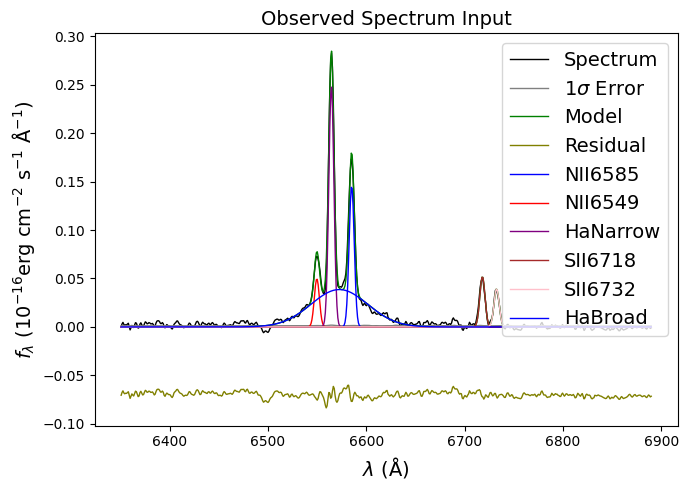

In [ ]:
lA1= 6350.0 #initial wave vale, it overrides wave_range if not None
lA2= 6890.0 #final wave vale, it overrides wave_range if not None
wave_range= 'HaNIISII' #name of the spectral range, options are Hbeta, Halpha and None

name_out='manga-8144-3702-LINCUBE'
test=True
sprogressd=True
cont=True
error_c=True
kskew=False
outflow=False
dirt='../example_data/'
dir_out='outputs/'
ncpus=6
config_lines='line_prop_manga.yml'
flux_f=1/10.0 
it=0
jt=0
zt=0.09785

if test:
    pgr_bar=False
    plot_f=True
else:
    plot_f=False
    if sprogressd:
        pgr_bar=False
    else:
        pgr_bar=True

if kskew:
    skew=True
    skl='_skew'
else:
    skew=False
    skl=''

file1=dirt+'NAME.fits.gz'.replace('NAME',name_out)
file2=dirt+'NAME.fits.gz'.replace('NAME',name_out)
file3=dirt+'NAMEM.fits.gz'.replace('NAMEM','Mask')  
if ptt.exists(dir_out) == False:
    tol.sycall('mkdir -p '+dir_out)
file_out=dir_out+'NAME_modelsV2'.replace('NAME',name_out)+wave_range+skl
file_out2=dir_out+'NAME_paramV2'.replace('NAME',name_out)+wave_range+skl
name_out2=name_out+wave_range+skl

line_fit(file1,file2,file3,file_out,file_out2,name_out2,z=zt,lA1=lA1,lA2=lA2,plot_f=plot_f,pgr_bar=pgr_bar,ncpu=ncpus,
         skew=skew,flux_f=flux_f,erft=0.75,cont=cont,test=test,error_c=error_c,i_t=it,j_t=jt,lorentz=lorentz,
         config_lines=config_lines,outflow=outflow)